In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mass_csv

In [152]:
def get_list(file_name):
    file = pd.read_csv(file_name)
    L_moment = file['Long Moment (emu)']
    H = file['Field (Oe)']
    T = file['Temperature (K)']
    T = np.array(T)
    return L_moment, H, T

In [153]:
def clean_for_plot(chi_t, T):
    return chi_t[191:], T[191:]

In [154]:
def calculate_chiT(mass, L_moment, H, T):
    M = np.zeros(len(L_moment)) 
    chi_T = np.zeros(len(L_moment)) 

    for row in range (1, len(L_moment)):
        M[row] = L_moment[row]/mass

    for i in range(1, len(H)):
        chi_T[i] = (M[i]/H[i])*T[i]

    return chi_T, M

In [155]:
def calculate_molarmass(M, Lm, field):
    M_perf = ((3.5*field)/400)
    closest_index = min(range(len(M)), key=lambda i: abs(M[i] - M_perf))
    return (Lm[closest_index]*400)/(3.5*field)

In [156]:
def get_trans_temp(xT, T):          #arguments have to be already cleaned
    spin_half = (np.max(xT) + np.min(xT))/2
    half_len_xT = int((len(xT)+1)/2)

    closest_index_down = min(range(half_len_xT, len(xT)), key=lambda j: abs(xT[j] - spin_half))

    closest_index_up = min(range(0, half_len_xT), key=lambda j: abs(xT[j] - spin_half))
    # print(spin_half, half_len_xT, closest_index_down, closest_index_up)
    return T[closest_index_down], T[closest_index_up]

FeTrz_Trt_big_FC_FH.rso

path: /home/fara/Documents/IFJ_2023/spin_crossover/dane/Trt_TEOS — kopia/Big TEOS


In [161]:
Trt_big_FC_FH_mass = mass_csv.get_mass()
Trt_big_FC_FH_mass = Trt_big_FC_FH_mass*2.5

Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T = get_list('FeTrz_Trt_big_FC_FH.rso.csv')
Trt_big_FC_FH_chiT, Trt_big_FC_FH_M = calculate_chiT(Trt_big_FC_FH_mass, Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T)

Trt_big_FC_FH_mass = calculate_molarmass(Trt_big_FC_FH_M, Trt_big_FC_FH_L_m, 1000)
Trt_big_FC_FH_chiT, Trt_big_FC_FH_M = calculate_chiT(Trt_big_FC_FH_mass, Trt_big_FC_FH_L_m, Trt_big_FC_FH_H, Trt_big_FC_FH_T)
Trt_big_FC_FH_chiT, Trt_big_FC_FH_T = clean_for_plot(Trt_big_FC_FH_chiT, Trt_big_FC_FH_T)

# get_trans_temp(Trt_big_FC_FH_chiT, Trt_big_FC_FH_T)

# Trt_big_FC_FH_chiT = Trt_big_FC_FH_chiT[1:]
# print(Trt_big_FC_FH_chiT)
# print(len(Trt_big_FC_FH_chiT), len(Trt_big_FC_FH_T))

# print(get_trans_temp(Trt_big_FC_FH_chiT, Trt_big_FC_FH_T))
T_down, T_up = get_trans_temp(Trt_big_FC_FH_chiT, Trt_big_FC_FH_T)
# print(type(Trt_big_FC_FH_chiT), type(Trt_big_FC_FH_T))
# Trt_big_FC_FH_T[idx_down]
print(T_down, T_up)

351.8756 375.1194


Text(0, 0.5, 'χT [emu/mol K]')

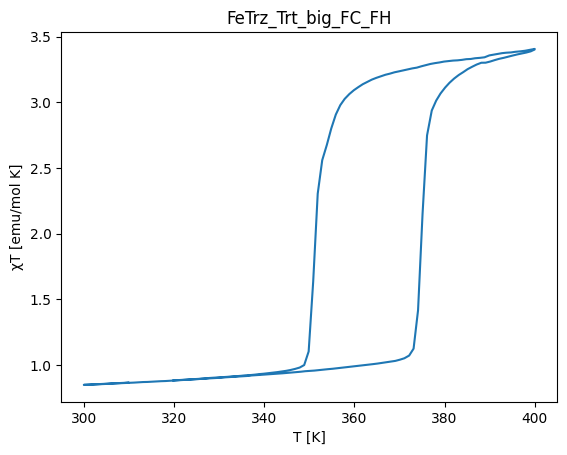

In [158]:
plt.plot(Trt_big_FC_FH_T, Trt_big_FC_FH_chiT)
plt.title('FeTrz_Trt_big_FC_FH')
plt.xlabel('T [K]')
plt.ylabel('χT [emu/mol K]')

FeTrz_Trt_medium_FC_FH.rso

/home/fara/Documents/IFJ_2023/spin_crossover/dane/Trt_TEOS — kopia/Medium TEOS

In [159]:
Trt_medium_FC_FH_mass = mass_csv.get_mass()
Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T = get_list('FeTrz_Trt_medium_FC_FH.rso.csv')
Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_M = calculate_chiT(Trt_medium_FC_FH_mass, Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T)

Trt_medium_FC_FH_mass = calculate_molarmass(Trt_medium_FC_FH_M, Trt_medium_FC_FH_L_m, 1000)
Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_M = calculate_chiT(Trt_medium_FC_FH_mass, Trt_medium_FC_FH_L_m, Trt_medium_FC_FH_H, Trt_medium_FC_FH_T)

Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_T = clean_for_plot(Trt_medium_FC_FH_chiT, Trt_medium_FC_FH_T)



Text(0, 0.5, 'χT [emu/mol K]')

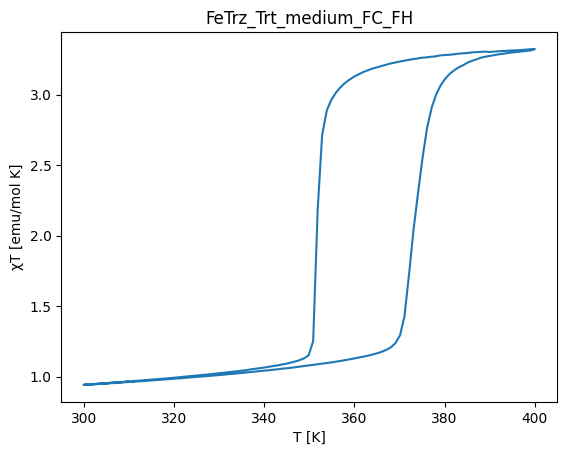

In [160]:
plt.plot(Trt_medium_FC_FH_T, Trt_medium_FC_FH_chiT)
plt.title('FeTrz_Trt_medium_FC_FH')
plt.xlabel('T [K]')
plt.ylabel('χT [emu/mol K]')